## Spectrophores: a short tutorial

### Dependencies

The Python-implementation of spectrophores requires the following tools to
be installed:

      * numpy <http://www.numpy.org>
      * scipy <http://www.scipy.org>
      * rdkit <http://www.rdkit.org>
      * boost <http://www.boost.org>

Please take a look at the websites addresses above to get more information about how to properly install these libraries. 

Under Ubuntu these libraries can be installed quite easily:

> sudo apt-get install python-numpy python-scipy python-matplotlib ipython ipython-notebook python-pandas python-sympy python-nose

> sudo apt-get install libboost-all-dev

> sudo apt-get install python-rdkit librdkit1 rdkit-data

### Installing the spectrophore library

Step 1 - download the spectrophore code from https://github.com/UAMCAntwerpen/spectrophores, and uncompress the tar-file that is contained in the 'dist/' folder.

Step 2 - untar the downloaded file and chdir into the created directory:

    > tar xvf spectrophore-1.0.1.tar.gz
    > cd spectrophore-1.0.1

Step 3 - install:

    > sudo python setup.py install

The installation process installs the following:

  - module 'spectrophore.py' is installed in the default third-party modules directory
    (for example '/usr/local/lib/python2.7/dist-packages/');

  - script 'sdf2spectrophore.py' is installed in the default third-party script directory
    (for example '/usr/local/bin/')

Now, you already can use the spectrophores in your python code by importing spectrophore library as following: 

In [2]:
from spectrophores.spectrophore import spectrophoreCalculator

### Importing RDKit in your python script

In [6]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem

### Importing the spectrophore library in your python script

In [7]:
from spectrophores.spectrophore import spectrophoreCalculator

## Reading molecules with RDKit and calculating spectrophores

In RDKit is possible to load molecules using several file formats, e.g. smiles, smarts, mol2, sdf. By default RDKit doesn't consider hydrogens when loading a molecule, hence it is important to add these later as the calculation of spectrophores relies on the presence of these hydrogens. 

### Loading molecules from a smiles string

In [8]:
smiles = 'F[C@@](I)(Br)Cl'
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol) 

0

### Calculating a spectrophore

In [9]:
calculator = spectrophoreCalculator()
calculator.calculate(mol)

array([  1.92190861,   2.58322483,   1.50779961,   4.47128574,
         5.49701023,   6.98774323,   4.25212321,   3.95179533,
         5.93661616,   8.23951424,   9.16096027,   5.32191626,
         2.04999628,   2.52032422,   6.84607253,   9.52229459,
        11.09511133,  13.52428646,   9.42900067,  13.15011982,
        14.28082103,  18.63760512,  21.34117248,  11.49421108,
         5.21088837,   3.72660843,   2.9043753 ,   6.03657827,
        10.51868127,   8.18885522,   6.28237231,   6.97597263,
         8.65288904,  12.48063001,  13.43179086,   9.62543559,
         0.90592641,   0.98933782,   2.97022263,   3.7140072 ,
         4.0505374 ,   4.2411592 ,   2.80612091,   4.0525092 ,
         4.34418157,   5.74555681,   6.78125949,   4.25966378])

### Working with multiple conformations

In case you are working with multiple conformations per molecule it is necessary to specify which conformations to calculate a spectrophore from. This is possible by passing the number of the desired conformation to the "calculate" function:

In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem
smiles = 'CC(CCC1=CC=CC=C1Cl)N1CCOCC1'
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
cids = AllChem.EmbedMultipleConfs(mol, numConfs = 10)

from spectrophores.spectrophore import spectrophoreCalculator
calculator = spectrophoreCalculator()

for cid in cids: _ = AllChem.MMFFOptimizeMolecule(mol, confId=cid)
for cid in cids:   print(calculator.calculate(mol, cid))

[   1.69378628    2.42846555    2.19273134    2.53188056    3.40216807
    3.62283092    2.50947917    2.74728235    3.18297814    4.26050919
    4.21743581    3.37794631    6.71855351   10.16885263   24.93965077
   29.5694384    20.34367691   27.74294369   18.14381424   36.99914479
   38.00127173   32.29358383   35.6426856    25.92318309   82.93894655
  126.43857279  121.25444546  153.20748262  142.59728171  153.47831833
   86.93458949  139.95810623  143.13159101  162.43633648  160.15619057
  183.21466287    1.27107123    2.1475741     3.28121841    3.31984206
    2.45392636    1.95668223    1.25846562    3.13711803    3.30722482
    2.93271979    2.68167904    3.00389807]
[   2.32066862    2.11072381    2.29140217    2.50708484    2.71491211
    2.884345      2.23274506    2.43039832    3.23474992    3.77265728
    3.30764713    3.02647622    6.86680711    9.36610107   21.65775546
   25.89405361   23.06544709   23.58429952   20.90896344   29.45401655
   31.65911819   34.32801172   36

Each conformation generates a slightly different spectrophore:

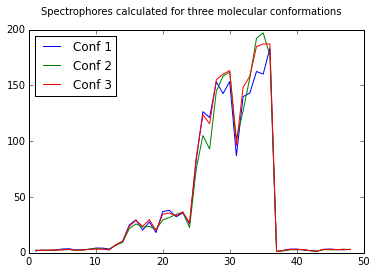

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

spectrophores = []
for cid in cids: spectrophores.append( calculator.calculate(mol, cid))

plt.plot(range(1,49), spectrophores[0], label='Conf 1')
plt.plot(range(1,49), spectrophores[1], label='Conf 2')
plt.plot(range(1,49), spectrophores[2], label='Conf 3')
plt.legend(loc='upper left')
plt.suptitle("Spectrophores calculated for three molecular conformations")

### Default options

#### Normalization:

Specifies the kind of normalization that should be performed. Valid values are: none  (default), mean, std, all

#### Stereo:

Specifies the kind of cages that should be used. Valid values are: none (default), unique, mirror, all

#### Accuracy:

This corresponds to the rotation stepsize. Valid values are: 1, 2, 5, 10, 15, 20 (default), 30, 36, 45, 60

#### Resolution:

This cooresponds to the minimum distance between the surrounding cage and molecule. Defaults to 3 Angstrons. This value should be larger than 0.

### Examples

In [13]:
# Using default options
calculator = spectrophoreCalculator(resolution=3, accuracy=20, stereo='none', normalization='none') ## default
calculator.calculate(mol)

array([   1.69378628,    2.42846555,    2.19273134,    2.53188056,
          3.40216807,    3.62283092,    2.50947917,    2.74728235,
          3.18297814,    4.26050919,    4.21743581,    3.37794631,
          6.71855351,   10.16885263,   24.93965077,   29.5694384 ,
         20.34367691,   27.74294369,   18.14381424,   36.99914479,
         38.00127173,   32.29358383,   35.6426856 ,   25.92318309,
         82.93894655,  126.43857279,  121.25444546,  153.20748262,
        142.59728171,  153.47831833,   86.93458949,  139.95810623,
        143.13159101,  162.43633648,  160.15619057,  183.21466287,
          1.27107123,    2.1475741 ,    3.28121841,    3.31984206,
          2.45392636,    1.95668223,    1.25846562,    3.13711803,
          3.30722482,    2.93271979,    2.68167904,    3.00389807])

In [14]:
calculator = spectrophoreCalculator(resolution=3, accuracy=30, stereo='all', normalization='all') ## switching options
calculator.calculate(mol)

array([-2.10601819, -0.95897094, -0.79508297, -0.8952884 , -0.11072353,
       -0.6382436 , -0.76314448,  0.08117981,  0.21030873,  0.40274669,
       -0.00487328,  0.96035211,  1.38784616,  0.54352397, -0.54650871,
        1.03697836,  0.26418437,  1.75746044, -2.78664569, -0.97638483,
       -0.65924939, -0.8742079 , -0.39948054, -0.87276164, -1.10971029,
       -0.19325362,  0.57861392,  0.45141051,  0.88445531,  0.73791569,
        1.67160706,  0.66977743,  0.43263338,  0.43168822,  0.6832943 ,
        1.50457152, -2.73804849,  0.24330047, -0.93968553, -0.47702825,
       -0.15991221, -0.65429954, -1.1360976 , -0.04277306,  0.10700579,
        0.64847433, -0.40324744,  0.49487761,  1.13218788, -0.48559613,
        0.56299333,  1.04670688,  0.96725186,  1.63599038, -2.80980031,
        0.31285342, -0.92266831, -0.35409379, -0.17692942, -0.50720829,
       -1.10344783, -0.12239989, -0.19083668,  0.6957315 , -0.55036565,
        0.84932822,  0.97057687, -0.21886717,  0.7812125 ,  0.97